# Inter-Rater Agreement Analysis

This analysis shows that raters within Twitter's Birdwatch community often disagree about whether a note is helpful. The key metric is a simple average of the binary flag on helpfulness assigned to Tweets by Birdwatch raters. 

A more sophisticated version of this analysis would apply Twitter's [algorithm](https://twitter.github.io/birdwatch/ranking-notes/) for computing Helpfulness Scores. Their algorithm aims to promote tweets that score highly across a wide range of Birdwatch raters with different ratings patterns, thereby promoting viewpoint diversity. 

To run this notebook, download both .tsv files from https://twitter.com/i/birdwatch/download-data and place the files in your `/birdwatch/data` directory. 

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
# Import Notes and Ratings data
notes = pd.read_csv('../data/notes-00000.tsv', sep='\t', header=0)
ratings = pd.read_csv('../data/ratings-00000.tsv', sep='\t', header=0)

In [3]:
# Condense the helpfulness column in Ratings
ratings['helpfulBinary'] = ratings['helpful']
ratings.loc[ratings['helpfulnessLevel']=="HELPFUL", 'helpfulBinary'] = 1

In [4]:
# Grouping by NoteId in order to aggregate ratings for each note
gb = ratings.groupby('noteId').agg({'helpfulBinary': ('mean', 'count')})
gb_min5 = pd.DataFrame(gb.loc[gb[('helpfulBinary', 'count')] >= 5])

Raters often disagree about the helpfulness of tweets.


<AxesSubplot:title={'center':'Average Helpfulness Rating \nfor Tweets with >5 Ratings'}, ylabel='Frequency'>

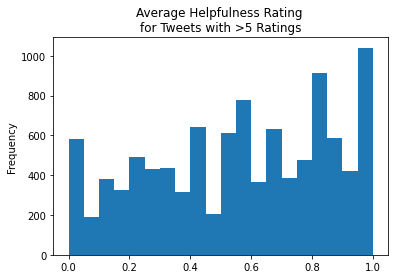

In [5]:
# First Chart
print('Raters often disagree about the helpfulness of tweets.')
gb_min5[('helpfulBinary', 'mean')].plot(kind='hist', 
             title='Average Helpfulness Rating \nfor Tweets with >5 Ratings',
             bins=20)

No strong relationship between number of ratings and average helpfulness.


<AxesSubplot:title={'center':'Relationship between Count and Avg Rating'}, xlabel='Number of Ratings', ylabel='Average Helpfulness Rating'>

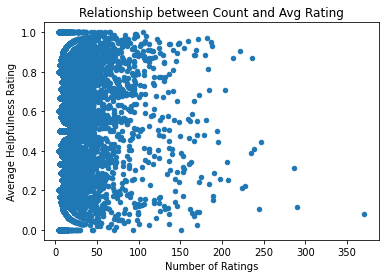

In [6]:
# Second Chart
print('No strong relationship between number of ratings and average helpfulness.')
gb_min5.plot.scatter(('helpfulBinary', 'count'), 
                     ('helpfulBinary', 'mean'),
                     xlabel='Number of Ratings', 
                     ylabel = 'Average Helpfulness Rating',                        
                     title = "Relationship between Count and Avg Rating")

In [7]:
print('Number of Tweets with >5 ratings where >90% of raters agreed with each other:')

gb_min5[((gb_min5[('helpfulBinary', 'mean')] >= 0.9) | 
         (gb_min5[('helpfulBinary', 'mean')] <= 0.1))].shape[0]

Number of Tweets with >5 ratings where >90% of raters agreed with each other:


2264